In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import colors, ticker, cm
from scipy.optimize import curve_fit
import utils as u
from uncertainties import ufloat

In [5]:
def power_law_fit_model(x,a,c):
    return c*x**(-a)


# One-dimensional

In [1014]:
def f(x):
    return np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

In [1015]:
f(0.12)

-0.46161646859705069

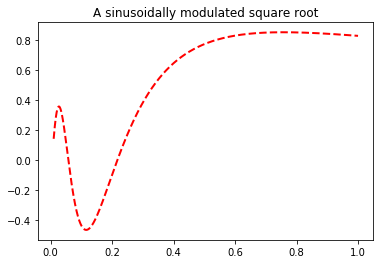

In [1016]:
x = np.linspace(0.01,1,10000); y = f(x);
plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
plt.show()

In [1045]:
def f(x):
    return (x**0.7)*np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

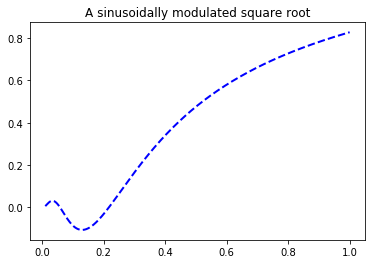

In [1046]:
x = np.linspace(0.01,1,10000); y = f(x);
plt.plot(x, y, color="blue", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
plt.show()

In [757]:
def f(x):
    return np.sqrt(x )*np.exp(-30*x**2)

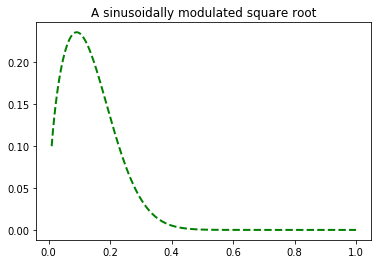

In [758]:
x = np.linspace(0.01,1,10000); y = f(x);
plt.plot(x, y, color="green", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
plt.show()

## MC

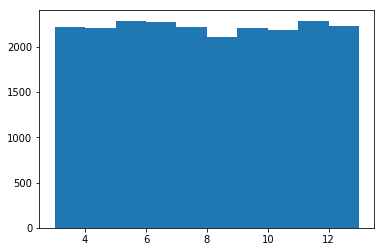

In [345]:
plt.hist(3+(13-3)*np.random.rand(22222))
plt.show()

Just to check I can make random numbers in a different range than [0,1)

Define functions which integrate in reange different from [0,1) (up to overall constant, which constant?)

In [725]:
def mcIntegralFastFunc(ff,nP,start=0,end=1,anti=False):
    _values=start+(end-start)*np.random.rand(nP)
    if anti:
        _values=_values[1:int(len(_values)/2+1)]
        _avalues=1-_values
        _anti_value=np.append(_avalues,_values)
        del _values
        _values=_anti_value
    _sampled_values=ff(_values) ;
    return (end-start)*np.sum(_sampled_values)/np.size(_sampled_values)

 $$\int_a^b f(x)dx=(b-a)\int_0^1 \, f\left( u\cdot(b-a)+a\right)\, du$$

In [715]:
def averageMCintegral(ff,nP,trials=100,start=0,end=1,anti=False):
    _arr=[ mcIntegralFastFunc(ff,nP,start=start,end=end,anti=anti) for k in range(trials) ]
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [435]:
def SquaredDeviation(x,mcIntegrals=mcIntegrals):
    return (f(x) - mcIntegrals[:,0][-1])**2

In [218]:
def Ufloat(x):
    return ufloat(x[0],x[1])
def UUfloat(z):
    return (z.n, z.s)

with this I can easily manipulate uncertainties!

In [793]:
z=Ufloat((3,0.1))
print(z.std_dev)
print(z.nominal_value)
print(UUfloat(z))

0.1
3.0
(3.0, 0.1)


In [817]:
_x = np.array([ 10**5, 3*10**5, 10**6, 2*10**6  ])
mcIntegrals=np.array([ averageMCintegral(f,k,trials=10) for k in _x ])

In [818]:
mcIntegrals

array([[  4.03870240e-01,   8.45714098e-04],
       [  4.04196042e-01,   3.81039480e-04],
       [  4.04547164e-01,   2.55415391e-04],
       [  4.04357219e-01,   2.38268559e-04]])

In [819]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])
_dy = mcIntegrals[:,1]

In [820]:
_y, _y[0:-1]

(array([ 0.00048698,  0.00016118,  0.00018995,  0.        ]),
 array([ 0.00048698,  0.00016118,  0.00018995]))

In [821]:
_dy, _dy[0:-1]

(array([ 0.00084571,  0.00038104,  0.00025542,  0.00023827]),
 array([ 0.00084571,  0.00038104,  0.00025542]))

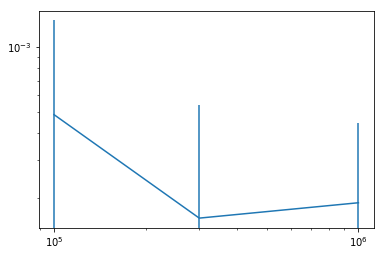

In [822]:
fig, ax = plt.subplots();
ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

## One shot integral 10K

In [1017]:
averageMCintegral(f,10000,start=0,end=1)

(0.52646779896683427, 0.0044497119495102329)

In [1047]:
trial=100
Err=[ averageMCintegral(f,10000,start=0,end=1,anti=False)[1] for k in range(trial) ]
del trial

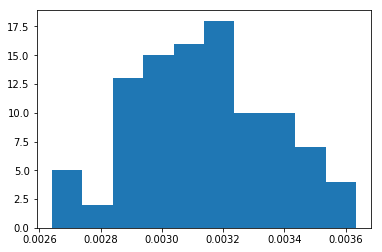

In [1048]:
plt.hist(Err)
plt.show()

In [1018]:
averageMCintegral(f,10000,start=0,end=1,anti=True)

(0.52598814530895077, 0.0030858976716271491)

### Antithetic

In [1049]:
trial=100
antiErr=[ averageMCintegral(f,10000,start=0,end=1,anti=True)[1] for k in range(trial) ]
del trial

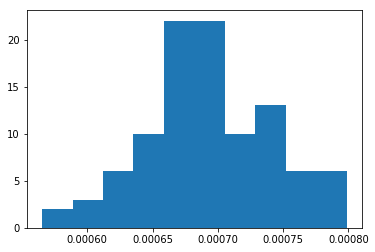

In [1050]:
plt.hist(antiErr)
plt.show()

In [1053]:
100/np.sqrt(2000)

2.2360679774997898

## 10 sub-ranges, 1K each

In [829]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [1019]:
subIntegrals=np.array([ Ufloat(averageMCintegral(f,1000,start=(k)*0.1,end=(k+1)*0.1)) for k in range(10)] )

In [1020]:
np.sum(subIntegrals)

0.525286243219133+/-0.0011168819229765833

In [1021]:
trial=100
splitErr=[ np.sum(np.array([ Ufloat(averageMCintegral(f,1000,start=(k)*0.1,end=(k+1)*0.1)) for k in range(10)] )).s for k in range(trial) ]
del trial


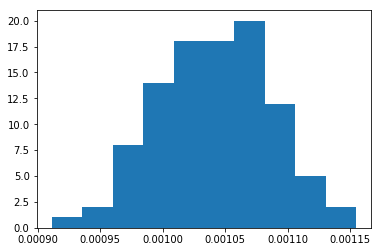

In [1022]:
plt.hist(splitErr)
plt.show()

## Variance

In [1023]:
oneShotVariance=averageMCintegral(SquaredDeviation,10000)
print(oneShotVariance)

(0.17789108151305816, 0.0024807615946194428)


that is the variance in the full inteval [0,1)

$\frac{\sigma^2}{N}$

In [1024]:
oneShotIntergralVar=oneShotVariance[0]/10000.0
print(oneShotIntergralVar)
print(np.sqrt(oneShotIntergralVar))

1.77891081513e-05
0.00421771361656


## Variances

In [836]:
list((1,2))+[11]

[1, 2, 11]

extending a list from a tuple. 

I want to compute the variance in a more elastic way using $\sigma^2 = <f^2> - <f>^2$. So let us define $f^2$ as function.

In [1025]:
def fSquare(x):
    return f(x)**2

In [1026]:
Ufloat(averageMCintegral(fSquare,10000,start=0,end=1))-Ufloat(averageMCintegral(f,10000,start=0,end=1))**2

0.17813565777493334+/-0.005007455063845888

In [1027]:
nPoints=10000;steps=10
StdDev = np.transpose(np.array([ \
                                  [k]+list(UUfloat(\
                                          (1/steps)*Ufloat(averageMCintegral(fSquare,nPoints,start=(k)*1/steps,end=(k+1)*1/steps))-\
                                          (1/steps**2)*Ufloat(averageMCintegral(f,nPoints,start=(k)*1/steps,end=(k+1)*1/steps))**2)) \
                                  for k in range(steps) ]))
# up to an overall constant 
del nPoints

In [1028]:
StdDev

array([[  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
          9.00000000e+00],
       [  6.95741147e-04,   1.26939665e-03,   4.55277677e-04,
          2.83114902e-03,   5.09885908e-03,   6.41039311e-03,
          7.00110397e-03,   7.16373376e-03,   7.09096232e-03,
          6.89583145e-03],
       [  5.35687067e-06,   7.69973690e-06,   4.54566317e-06,
          7.39768887e-06,   4.96596217e-06,   2.42920769e-06,
          1.02473866e-06,   9.52084345e-08,   4.53698441e-07,
          6.18795606e-07]])

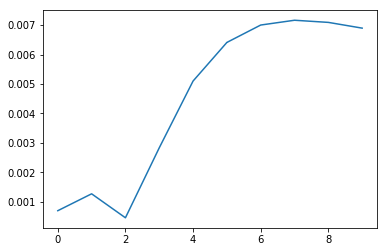

In [1029]:
fig, ax = plt.subplots();
#ax.set_yscale('log');
#ax.set_xscale('log');
ax.errorbar(StdDev[0], StdDev[1], yerr=StdDev[2])
plt.show()

In [1030]:
np.sum(np.power(StdDev[1],1))

0.044912448188058646

In [1031]:
np.sqrt(np.sum(np.power(StdDev[1],2)))

0.016600553789256536

$\sum_i ||r_i||  \frac{\sigma_i^2}{N_i}$

In [847]:
StratifiedIntegralVar=0.01*np.sum(np.power(StdDev[1],2))/1000
print(StratifiedIntegralVar)

1.21804047232e-09


In [848]:
np.sqrt(StratifiedIntegralVar/oneShotIntergralVar)

0.010354363057190541

### Some other variances

In [1008]:
def f(x):
    return 3/2*np.sqrt(x)

In [1009]:
Ufloat(averageMCintegral(fSquare,10000,start=0,end=1))-Ufloat(averageMCintegral(f,10000,start=0,end=1))**2

0.12447913364524221+/-0.009197160995764312

In [1010]:
def f(x):
    return np.log(1+x)

In [1011]:
Ufloat(averageMCintegral(fSquare,10000,start=0,end=1))-Ufloat(averageMCintegral(f,10000,start=0,end=1))**2

0.03885849680558601+/-0.002079846240960412

In [1012]:
def f(x):
    return np.sqrt(x)/np.log(1+x)

In [1013]:
Ufloat(averageMCintegral(fSquare,10000,start=0,end=1))-Ufloat(averageMCintegral(f,10000,start=0,end=1))**2

18.37893021360545+/-72.21236101188099

## Linear Density

In [561]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [849]:
def num(k,weights,total):
    _weights=np.array(weights)
    return int(_weights[k]/np.sum(_weights)*total)

In [629]:
np.sum([ num(k,[0.1,],10000) for k in range(10)])

9996

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


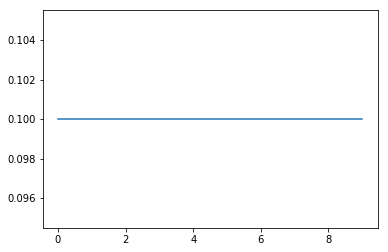

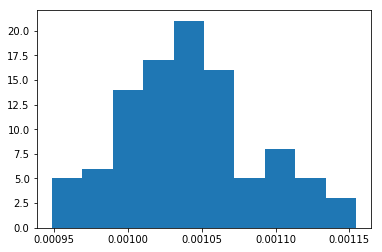

In [947]:
steps=10
w=np.random.rand(steps)
w=[1/steps for k in range(steps)]
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


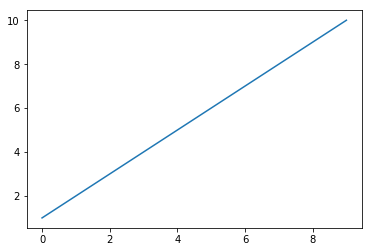

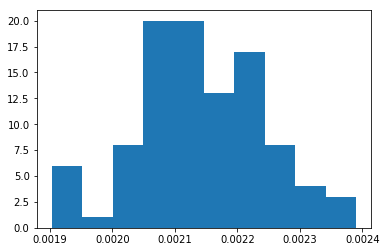

In [948]:
steps=10
w=np.random.rand(steps)
w=[ (x+1)**1 for x in range(10) ]
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


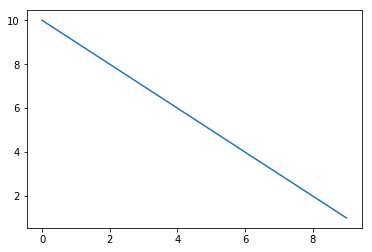

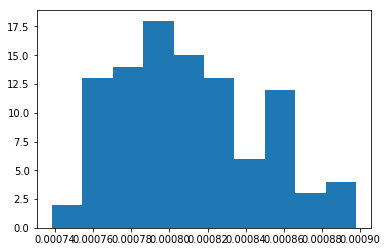

In [1032]:
steps=10
w=np.random.rand(steps)
w=[ (10-x)**1 for x in range(10) ]
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

[1000, 729, 512, 343, 216, 125, 64, 27, 8, 1]


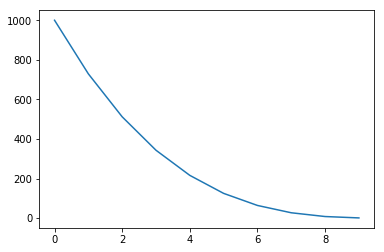

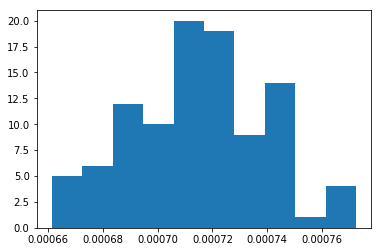

In [1033]:
steps=10
w=np.random.rand(steps)
w=[ (10-x)**3 for x in range(10) ]
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

[1.0, 1.148698354997035, 1.2457309396155174, 1.3195079107728942, 1.379729661461215, 1.4309690811052556, 1.4757731615945522, 1.5157165665103982, 1.5518455739153598, 1.5848931924611136]


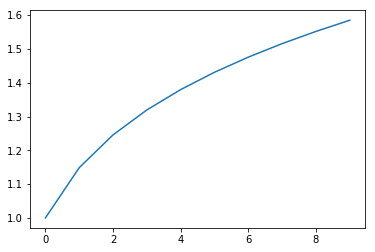

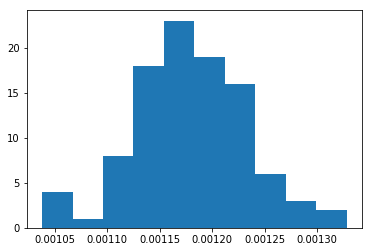

In [949]:
steps=10
w=np.random.rand(steps)
w=[ (x+1)**0.2 for x in range(10) ]
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

[  1.62527224e-04   3.34568957e-04   9.77069213e-05   8.75620252e-04
   1.77432613e-03   2.33481522e-03   2.59541670e-03   2.66788255e-03
   2.63541095e-03   2.54861305e-03]


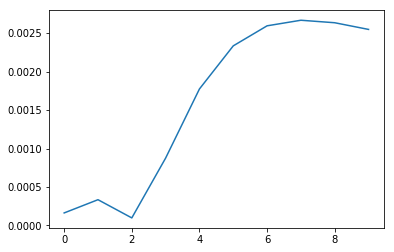

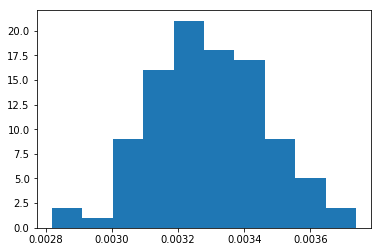

In [950]:
steps=10
w=np.random.rand(steps)
w=np.power(StdDev[1],1.2)
print(w)
plt.plot(w)
plt.show()
plt.hist([ np.sum(np.array([ Ufloat(averageMCintegral(f,num(k,w,10000),start=(k)*1/steps,end=(k+1)*1/steps)) for k in range(steps)] )).s for p in range(100) ])
plt.show()

## Halton MC

In [956]:
import ghalton

In [974]:
sequencer = ghalton.Halton(1)

In [958]:
points = sequencer.get(1000000)

In [959]:
list_points=np.array(u.flattenOnce(points))

In [261]:
u.write_lines_to_file_newline(list_points,'numbers.txt')

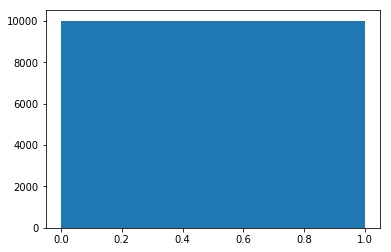

In [963]:
plt.hist(list_points,100)
plt.show()

the sequence of points is very uniform. It is basically constant even in a range 100 times smaller than unit range.

a truly random sequence instead would be much more fluctuating on that scale

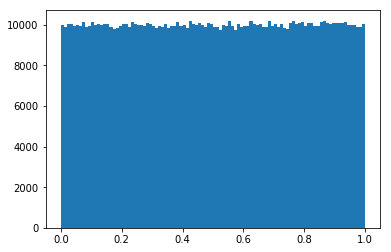

In [964]:
randoms=np.random.rand(len(points))
plt.hist(randoms,100)
plt.show()

for a given number of points, the sequence is always the same. this means that if I need to make more points I can resuse the first evaluations of the function because they need to be evaluated on points that I have already evaluated in the integral that used fewer points.

In [987]:
sequencer = ghalton.Halton(1)
points = sequencer.get(5)
print(points)

[[0.5], [0.25], [0.75], [0.125], [0.625]]


In [988]:
sequencer = ghalton.Halton(1)
points = sequencer.get(10)
print(points)

[[0.5], [0.25], [0.75], [0.125], [0.625], [0.375], [0.875], [0.0625], [0.5625], [0.3125]]


attenzione! questa implementazione continua nella sequenza

In [984]:
#sequencer = ghalton.Halton(1)
points = sequencer.get(5)
print(points)

[[0.109375], [0.609375], [0.359375], [0.859375], [0.234375]]


In [985]:
#sequencer = ghalton.Halton(1)
points = sequencer.get(5)
print(points)

[[0.734375], [0.484375], [0.984375], [0.0078125], [0.5078125]]


In [986]:
#sequencer = ghalton.Halton(1)
points = sequencer.get(10)
print(points)

[[0.2578125], [0.7578125], [0.1328125], [0.6328125], [0.3828125], [0.8828125], [0.0703125], [0.5703125], [0.3203125], [0.8203125]]


it is not necesaary to repeat the integral many times, because we are using a fixed sequence of N number, so it would always give the same result

In [989]:
def averageHaltonMCintegral(nP,trials=1):
    _arr=[ HaltonMCintegral(int(nP)) for k in range(trials) ]
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [990]:
def HaltonMCintegral(k):
    sequencer = ghalton.Halton(1)
    points = sequencer.get(k)
    list_points=np.array(u.flattenOnce(points))
    _values=list_points
    _sampled_values=f(_values) ;
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [1034]:
_x = np.power(np.array([  10, 30, 50, 70, 100 ]),3)
_x = np.array([ 1000, 10000, 100000, 10**6,5*10**6, 8*10**6 ])

#_x = [10,30,50,100,300,1000]
mcIntegrals=np.array([ averageHaltonMCintegral(k,trials=1) for k in _x ])

In [1035]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])

_dy = mcIntegrals[:,1]

In [1036]:
_y, _y[0:-1]

(array([  1.03434734e-03,   1.32336109e-04,   1.55418607e-05,
          1.56697658e-06,   2.41607258e-07,   0.00000000e+00]),
 array([  1.03434734e-03,   1.32336109e-04,   1.55418607e-05,
          1.56697658e-06,   2.41607258e-07]))

In [1037]:
_dy, _dy[0:-1]

(array([ 0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.]))

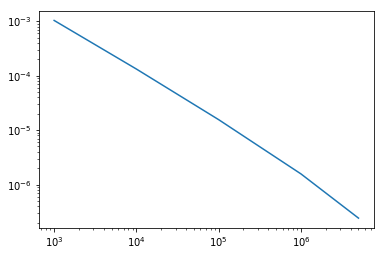

In [1038]:
fig, ax = plt.subplots();

ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

In [1039]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [1040]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([  1.15134798,  12.47542772]), array([[ 0.01626993,  0.2254178 ],
        [ 0.2254178 ,  3.12356041]]), 1.0480987450259189)

In [1041]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

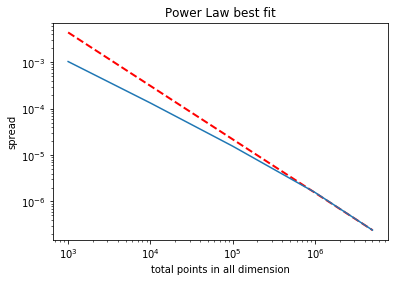

In [1042]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

### Violin Plot

In [194]:
def MCintegralsNd(nP,trials=100,dims=3):
    _arr=np.array([ mcIntegralFastNd(nP,dims=dims) for k in range(trials) ])
    return _arr  #returns all the values

In [211]:
_x = np.power(np.array( [ 10, 15, 20, 25, 30, 35, 40 ] ),5)/100
print(np.log10(_x))
mc_int_results=np.array([ MCintegralsNd(int(k),dims=5) for k in _x ])

[ 3.          3.8804563   4.50514998  4.98970004  5.38560627  5.72034022
  6.01029996]


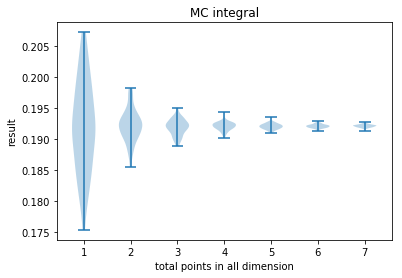

In [214]:
fig, ax = plt.subplots();
#ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.violinplot(mc_int_results.T);
ax.set_title("MC integral");
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('result')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

In [215]:
y=np.array(mc_int_results)-np.mean(mc_int_results[-1])

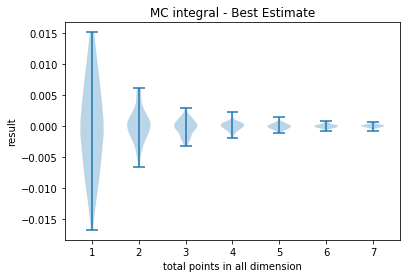

In [217]:
fig, ax = plt.subplots();
#ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.violinplot(y.T);
ax.set_title("MC integral - Best Estimate");
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('result')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()